<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W9D5_MiniProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai
!pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00


In [2]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [3]:
!pip install anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 12.4 MB/s eta 0:00:00


In [4]:
!pip install spacy

In [5]:
!pip install wordcloud matplotlib pandas

In [6]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
import pandas as pd

musical_data = pd.read_csv('Musical_instruments_reviews.csv')
musical_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


Description of columns in the file:

**reviewerID** - ID of the reviewer, e.g. A2SUAM1J3GNN3B

**asin** - ID of the product, e.g. 0000013714

**reviewerName** - name of the reviewer

**helpful** - helpfulness rating of the review, e.g. 2/3

**reviewText** - text of the review

**overall** - rating of the product

**summary** - summary of the review

**unixReviewTime** - time of the review (unix time)

**reviewTime** - time of the review (raw)

In [8]:
musical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [9]:
musical_data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [10]:
musical_data.duplicated().sum()

0

In [11]:
musical_data.dropna(inplace=True)

In [12]:
musical_data.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [13]:
musical_data['overall'].value_counts()

overall
5.0    6912
4.0    2079
3.0     771
2.0     249
1.0     216
Name: count, dtype: int64

In [14]:
musical_data['helpful'].value_counts()

helpful
[0, 0]      6770
[1, 1]      1158
[2, 2]       377
[0, 1]       334
[1, 2]       231
            ... 
[41, 44]       1
[4, 13]        1
[22, 23]       1
[20, 23]       1
[4, 16]        1
Name: count, Length: 266, dtype: int64

In [15]:
musical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10227 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10227 non-null  object 
 1   asin            10227 non-null  object 
 2   reviewerName    10227 non-null  object 
 3   helpful         10227 non-null  object 
 4   reviewText      10227 non-null  object 
 5   overall         10227 non-null  float64
 6   summary         10227 non-null  object 
 7   unixReviewTime  10227 non-null  int64  
 8   reviewTime      10227 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 799.0+ KB


In [16]:
print(len(musical_data['reviewerID'].unique()))
print(musical_data['reviewerID'].count())

1428
10227


In [17]:
print(len(musical_data['reviewerName'].unique()))

1397


In [18]:
musical_data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [18]:
import anthropic
import pandas as pd

# Replace 'your_api_key' with your actual Claude API key
api_key = "My API Key"
# Initialize the Claude client with your API key
client = anthropic.Client(api_key=api_key)
# Choose the appropriate Claude model for text-based analysis
model = "claude-3-opus-20240229"
# Formulate a question to ask Claude
question = f'''You are a data analyst. You have a dataset https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews?select=Musical_instruments_reviews.csv with columns ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime']. Analyze common themes, sentiments, and improvement suggestions based on the reviewText.'''
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

As a data analyst, I can help you analyze the common themes, sentiments, and improvement suggestions based on the 'reviewText' column in the Amazon Music Reviews dataset. Here's a step-by-step approach to tackling this task:

1. Data Loading and Preprocessing:
   - Download the dataset from the provided Kaggle link.
   - Load the dataset into a suitable data structure, such as a pandas DataFrame in Python.
   - Perform any necessary data cleaning and preprocessing steps, such as handling missing values or removing irrelevant characters from the 'reviewText' column.

2. Sentiment Analysis:
   - Utilize a sentiment analysis library or pre-trained model, such as TextBlob or VADER, to determine the sentiment of each review in the 'reviewText' column.
   - Calculate the overall sentiment score for each review and classify them as positive, negative, or neutral based on predefined thresholds.
   - Analyze the distribution of sentiment scores to understand the overall sentiment of the reviews

In [19]:
musical_data['reviewTime'] = pd.to_datetime(musical_data['reviewTime'])
musical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10227 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      10227 non-null  object        
 1   asin            10227 non-null  object        
 2   reviewerName    10227 non-null  object        
 3   helpful         10227 non-null  object        
 4   reviewText      10227 non-null  object        
 5   overall         10227 non-null  float64       
 6   summary         10227 non-null  object        
 7   unixReviewTime  10227 non-null  int64         
 8   reviewTime      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 799.0+ KB


In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
import spacy
import itertools

# list of emoji
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# function that cleans the text with cleaning stop words
def cleaning_data(text):
    lemmatizer = WordNetLemmatizer()
    preprocessed_data = []
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    for tweet in text:
      tweet = str(tweet)
      tweet = tweet.lower()
      tweet = tweet.replace("#", "")
      tweet = tweet.replace("@", "")
      tweet = re.sub(r'http\S+', '', tweet)
      tweet = re.sub(email_pattern, '', tweet)
      tweet = emoji_pattern.sub(r'', tweet)
      tokens = word_tokenize(tweet)
      tokens = [' '.join(word for word in tokens if word not in string.punctuation)]
      tokens = [lemmatizer.lemmatize(word) for word in tokens]
      preprocessed_data.append(tokens)
    return preprocessed_data

In [21]:
list_of_reviews = musical_data['reviewText'].tolist()
print(list_of_reviews[:10])

["Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,", "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]", 'The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volu

In [22]:
music_preprocessed_reviews = cleaning_data(list_of_reviews)
music_preprocessed_reviews = list(itertools.chain(*music_preprocessed_reviews))
print(music_preprocessed_reviews[:10])

["not much to write about here but it does exactly what it 's supposed to filters out the pop sounds now my recordings are much more crisp it is one of the lowest prices pop filters on amazon so might as well buy it they honestly work the same despite their pricing", "the product does exactly as it should and is quite affordable.i did not realized it was double screened until it arrived so it was even better than i had expected.as an added bonus one of the screens carries a small hint of the smell of an old grape candy i used to buy so for reminiscent 's sake i can not stop putting the pop filter next to my nose and smelling it after recording dif you needed a pop filter this will work just as well as the expensive ones and it may even come with a pleasing aroma like mine did buy this product", 'the primary job of this device is to block the breath that would otherwise produce a popping sound while allowing your voice to pass through with no noticeable reduction of volume or high frequ

In [23]:
musical_data['New_Text_Review'] = music_preprocessed_reviews

In [24]:
musical_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,New_Text_Review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,2014-02-28,not much to write about here but it does exact...
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,2013-03-16,the product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,2013-08-28,the primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14,nice windscreen protects my mxl mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21,this pop filter is great it looks and performs...


In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    # Analyze sentiment of the text
    sentiment_score = sid.polarity_scores(text)

    # Classify sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
musical_data['Sentiment'] = musical_data['New_Text_Review'].apply(get_sentiment)

# Display the dataframe with the new 'sentiment' column
print(musical_data[['New_Text_Review', 'Sentiment']])

                                         New_Text_Review Sentiment
0      not much to write about here but it does exact...  Positive
1      the product does exactly as it should and is q...  Positive
2      the primary job of this device is to block the...  Negative
3      nice windscreen protects my mxl mic and preven...  Positive
4      this pop filter is great it looks and performs...  Positive
...                                                  ...       ...
10256                great just as expected thank to all  Positive
10257  i 've been thinking about trying the nanoweb s...  Positive
10258  i have tried coated strings in the past includ...  Positive
10259  well made by elixir and developed with taylor ...  Positive
10260  these strings are really quite good but i woul...  Positive

[10227 rows x 2 columns]


In [26]:
from nltk.corpus import stopwords

# list of emoji
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# function that cleans the text with cleaning stop words
def cleaning_data_stop(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    preprocessed_data = []
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    for tweet in text:
        tweet = str(tweet)
        tweet = tweet.lower()
        tweet = tweet.replace("#", "")
        tweet = tweet.replace("@", "")
        tweet = re.sub(r'http\S+', '', tweet)
        tweet = re.sub(email_pattern, '', tweet)
        tweet = emoji_pattern.sub(r'', tweet)
        tokens = word_tokenize(tweet)
        tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        preprocessed_data.append(' '.join(tokens))
    return preprocessed_data

In [27]:
music_preprocessed_reviews2 = cleaning_data_stop(list_of_reviews)
# music_preprocessed_reviews2 = list(itertools.chain(*music_preprocessed_reviews2))
print(music_preprocessed_reviews2[:10])

["much write exactly 's supposed filter pop sound recording much crisp one lowest price pop filter amazon might well buy honestly work despite pricing", "product exactly quite affordable.i realized double screened arrived even better expected.as added bonus one screen carry small hint smell old grape candy used buy reminiscent 's sake stop putting pop filter next nose smelling recording dif needed pop filter work well expensive one may even come pleasing aroma like mine buy product", 'primary job device block breath would otherwise produce popping sound allowing voice pas noticeable reduction volume high frequency double cloth filter block pop let voice coloration metal clamp mount attache mike stand secure enough keep attached goose neck need little coaxing stay put', 'nice windscreen protects mxl mic prevents pop thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging', "pop filter great look performs like studio filter 're recording voca

In [28]:
musical_data['New_Text_Review_without_StopWords'] = music_preprocessed_reviews2

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    # Analyze sentiment of the text
    sentiment_score = sid.polarity_scores(text)

    # Classify sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
musical_data['New_Sentiment'] = musical_data['New_Text_Review_without_StopWords'].apply(get_sentiment)

# Display the dataframe with the new 'sentiment' column
print(musical_data[['New_Text_Review_without_StopWords', 'reviewerID','New_Sentiment', 'Sentiment']])

                       New_Text_Review_without_StopWords      reviewerID  \
0      much write exactly 's supposed filter pop soun...  A2IBPI20UZIR0U   
1      product exactly quite affordable.i realized do...  A14VAT5EAX3D9S   
2      primary job device block breath would otherwis...  A195EZSQDW3E21   
3      nice windscreen protects mxl mic prevents pop ...  A2C00NNG1ZQQG2   
4      pop filter great look performs like studio fil...   A94QU4C90B1AX   
...                                                  ...             ...   
10256                               great expected thank  A14B2YH83ZXMPP   
10257  've thinking trying nanoweb string bit put hig...   A1RPTVW5VEOSI   
10258  tried coated string past including elixir neve...   AWCJ12KBO5VII   
10259  well made elixir developed taylor guitar ... s...  A2Z7S8B5U4PAKJ   
10260  string really quite good would n't call perfec...  A2WA8TDCTGUADI   

      New_Sentiment Sentiment  
0          Positive  Positive  
1          Positive  Po

In [30]:
print(musical_data['New_Sentiment'].value_counts())

New_Sentiment
Positive    9221
Negative     738
Neutral      268
Name: count, dtype: int64


In [31]:
print(musical_data['Sentiment'].value_counts())

Sentiment
Positive    9014
Negative     927
Neutral      286
Name: count, dtype: int64


In [32]:
text_check = musical_data[musical_data['reviewerID'] == 'AWCJ12KBO5VII']['reviewText'].values[0]
print(text_check)

My wife & myself are a Celtic duo and a number of our shows are at renaiessance fairs where no visable pa equipment is allowed. We considered a wireless to use with a battery powered Crate Taxi which could easily be hidden but most wireless receivers need a power outlet & at these events no power is available. When I saw this at the price offered  and that both the mic transmitter and the receiver were battery powered I thought it was worth a try. In the past we had a problem keeping an audiance because at some events where the natural acoustics are less than stellar they just plain couldn't hear the stories in the songs. We use this to give our voices a small, unobvious boost. It kind of has the effect of adding a tweeter to a speaker in that it gives our voices the clairity to be understood. The result has been that audiances now stay for the entire show, laughing at the comedy, crying at the tragedy.  Our tips & cd sales have gone WAY up. Is it high fidelity? Quite simply, no. But i

So, as we can see, simply just analyse some of the reviews, the sentiment analysis is good works with the text with stopwords. That's why we will leave only one column, in which was made a VADER sentiment analysis with the text with stopwords.

In [33]:
musical_data = musical_data.drop('New_Sentiment', axis=1, inplace=False)
musical_data = musical_data.drop('New_Text_Review_without_StopWords', axis=1, inplace=False)

In [65]:
positive_review = musical_data.loc[musical_data.Sentiment == 'Positive']
neutral_review = musical_data.loc[musical_data.Sentiment == 'Neutral']
negative_review = musical_data.loc[musical_data.Sentiment == 'Negative']

In [66]:
daily_positive_review_count = positive_review.groupby(pd.Grouper(key = 'reviewTime', freq = 'D')).size()
daily_neutral_review_count = neutral_review.groupby(pd.Grouper(key = 'reviewTime', freq = 'D')).size()
daily_negative_review_count = negative_review.groupby(pd.Grouper(key = 'reviewTime', freq = 'D')).size()

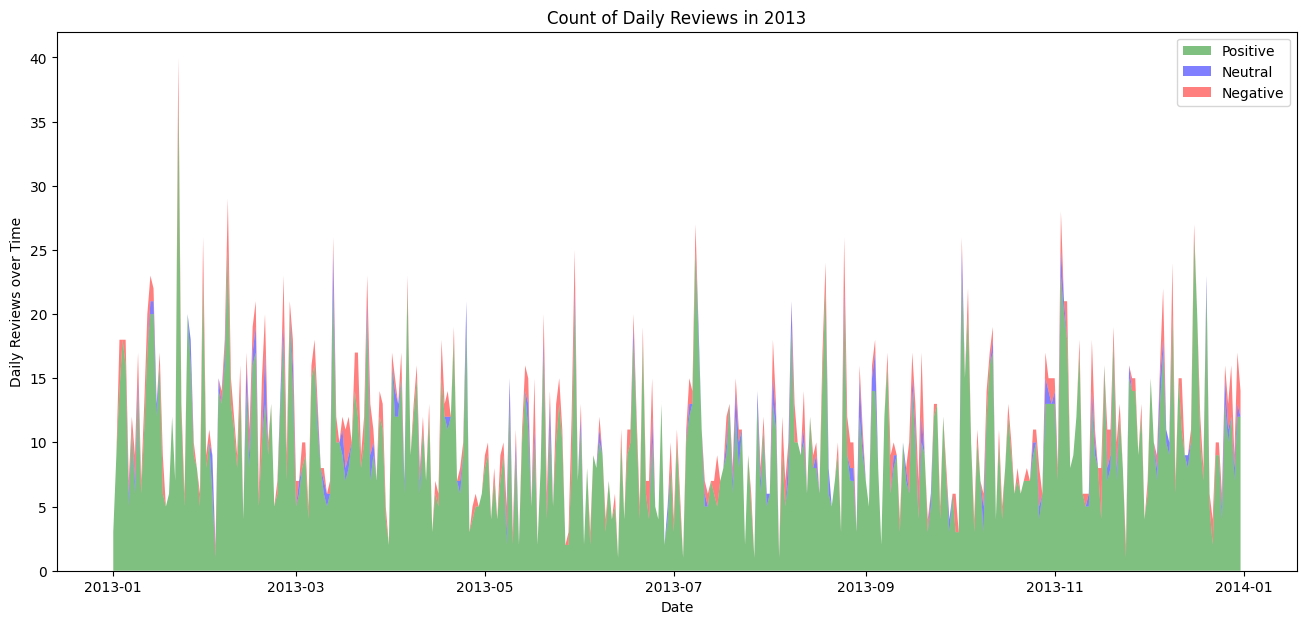

In [69]:
# Filter the data to include only the year 2013
daily_positive_review_count_2013 = daily_positive_review_count[daily_positive_review_count.index.year == 2013]
daily_neutral_review_count_2013 = daily_neutral_review_count[daily_neutral_review_count.index.year == 2013]
daily_negative_review_count_2013 = daily_negative_review_count[daily_negative_review_count.index.year == 2013]

# Create a common index for the year 2013
common_index_2013 = daily_positive_review_count_2013.index.union(daily_neutral_review_count_2013.index).union(daily_negative_review_count_2013.index)

# Reindex all series to this common index and fill missing values with 0
daily_positive_review_count_2013 = daily_positive_review_count_2013.reindex(common_index_2013, fill_value=0)
daily_neutral_review_count_2013 = daily_neutral_review_count_2013.reindex(common_index_2013, fill_value=0)
daily_negative_review_count_2013 = daily_negative_review_count_2013.reindex(common_index_2013, fill_value=0)

# Create stacked area chart
plt.figure(figsize=(16, 7))
plt.stackplot(common_index_2013,
              daily_positive_review_count_2013.values,
              daily_neutral_review_count_2013.values,
              daily_negative_review_count_2013.values,
              labels=['Positive', 'Neutral', 'Negative'],
              colors=['green', 'blue', 'red'],
              alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Daily Reviews over Time')
plt.title('Count of Daily Reviews in 2013')
plt.legend()
plt.show()

In [34]:
musical_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,New_Text_Review,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,2014-02-28,not much to write about here but it does exact...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,2013-03-16,the product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,2013-08-28,the primary job of this device is to block the...,Negative
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,2014-02-14,nice windscreen protects my mxl mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,2014-02-21,this pop filter is great it looks and performs...,Positive


In [35]:
list_of_summaries = musical_data['summary'].tolist()
print(list_of_summaries[:10])

['good', 'Jake', 'It Does The Job Well', 'GOOD WINDSCREEN FOR THE MONEY', 'No more pops when I record my vocals.', 'The Best Cable', "Monster Standard 100 - 21' Instrument Cable", "Didn't fit my 1996 Fender Strat...", 'Great cable', 'Best Instrument Cables On The Market']


In [36]:
music_preprocessed_summaries = cleaning_data(list_of_summaries)
music_preprocessed_summaries = list(itertools.chain(*music_preprocessed_summaries))
print(music_preprocessed_summaries[:10])

['good', 'jake', 'it does the job well', 'good windscreen for the money', 'no more pops when i record my vocals', 'the best cable', 'monster standard 100 21 instrument cable', "did n't fit my 1996 fender strat ...", 'great cable', 'best instrument cables on the market']


In [37]:
musical_data['New_Summary'] = music_preprocessed_summaries

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    # Analyze sentiment of the text
    sentiment_score = sid.polarity_scores(text)

    # Classify sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
musical_data['Summary_Sentiment'] = musical_data['New_Summary'].apply(get_sentiment)

# Display the dataframe with the new 'sentiment' column
print(musical_data[['New_Summary', 'Summary_Sentiment', 'Sentiment']])

                                             New_Summary Summary_Sentiment  \
0                                                   good          Positive   
1                                                   jake           Neutral   
2                                   it does the job well          Positive   
3                          good windscreen for the money          Positive   
4                   no more pops when i record my vocals          Negative   
...                                                  ...               ...   
10256                                         five stars           Neutral   
10257  long life and for some players a good economic...          Positive   
10258                                    good for coated          Positive   
10259                                        taylor made           Neutral   
10260  these strings are really quite good but i woul...          Negative   

      Sentiment  
0      Positive  
1      Positive  
2      Ne

In [39]:
print(musical_data['Summary_Sentiment'].value_counts())

Summary_Sentiment
Positive    6539
Neutral     3055
Negative     633
Name: count, dtype: int64


In [ ]:
positive_tweets = covid_data.loc[covid_data.sentiment == 'Positive']
neutral_tweets = covid_data.loc[covid_data.sentiment == 'Neutral']
negative_tweets = covid_data.loc[covid_data.sentiment == 'Negative']

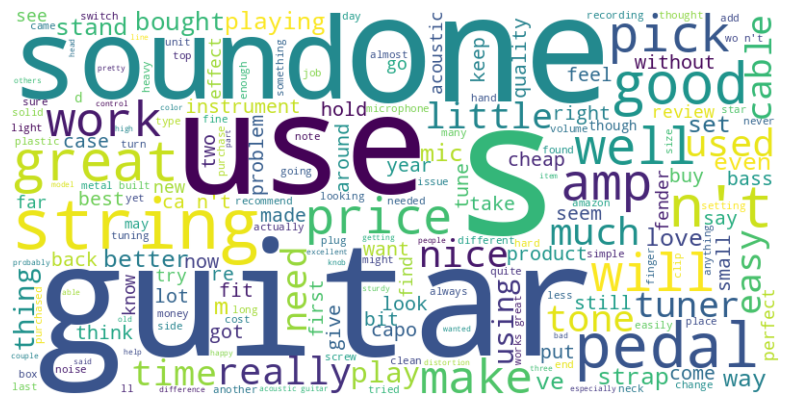

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Concatenate all tweets into a single text string
text = ' '.join(tweet for tweet in musical_data['New_Text_Review'])

# Create the word cloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

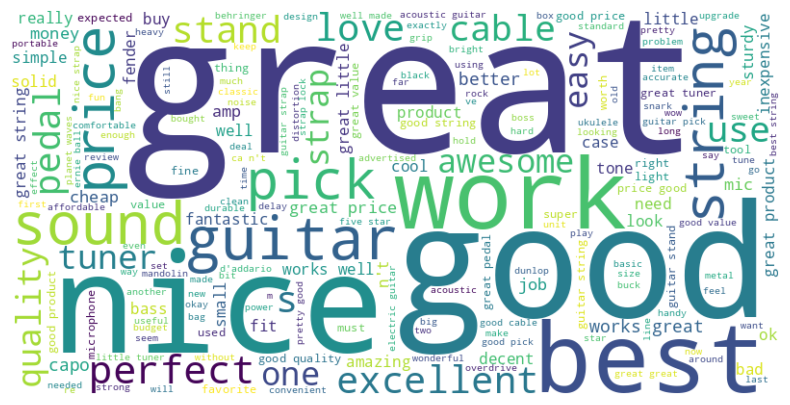

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Concatenate all tweets into a single text string
text = ' '.join(tweet for tweet in musical_data['New_Summary'])

# Create the word cloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Use TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(musical_data['New_Text_Review'])

# For LDA, use CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count = count_vectorizer.fit_transform(musical_data['New_Text_Review'])


In [43]:
# Define the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(count)

# Get the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda_model, count_vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
great guitar use works product easy case string good price
Topic 1:
pedal amp sound pedals like tone great just use does
Topic 2:
tuner capo tune guitar use tuners tuning easy like works
Topic 3:
picks pick sound like mic use good used grip just
Topic 4:
cable good great cables mic quality price use works just
Topic 5:
guitar stand strap just fit like case does good guitars
Topic 6:
just like ve guitar strap great use 34 time used
Topic 7:
strings guitar sound great play good string like acoustic tone
Topic 8:
guitar strings strap good price nice like just better quality
Topic 9:
use recording mic sound just quality using audio microphone usb


In [44]:
# Define the NMF model
nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(tfidf)

# Get the topics
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
tuner easy use tune tuners snark tuning accurate clip little
Topic 1:
strings sound string addario ve tone elixir set time long
Topic 2:
strap leather locks straps comfortable button nice like lock looks
Topic 3:
picks pick grip like dunlop playing holder jazz just nice
Topic 4:
pedal amp pedals sound tone like distortion sounds just power
Topic 5:
cable cables quality monster xlr hosa waves planet ends patch
Topic 6:
stand mic microphone use does stands music sturdy boom recording
Topic 7:
great works price product love buy looks sound recommend nice
Topic 8:
guitar acoustic electric case guitars just neck capo bought play
Topic 9:
good price quality really product does job pretty deal sound


In [45]:
import numpy as np
# Get the topic distribution for each document
lda_topic_distribution = lda_model.transform(count)
nmf_topic_distribution = nmf_model.transform(tfidf)

# Example: Get the dominant topic for each document
musical_data['dominant_topic_lda'] = np.argmax(lda_topic_distribution, axis=1)
musical_data['dominant_topic_nmf'] = np.argmax(nmf_topic_distribution, axis=1)

# Analyze the distribution of topics
lda_topic_counts = musical_data['dominant_topic_lda'].value_counts().sort_index()
nmf_topic_counts = musical_data['dominant_topic_nmf'].value_counts().sort_index()

print("LDA Topic Distribution:")
print(lda_topic_counts)

print("NMF Topic Distribution:")
print(nmf_topic_counts)


LDA Topic Distribution:
dominant_topic_lda
0     730
1    1577
2     842
3     575
4    1520
5    1405
6     731
7    1425
8     735
9     687
Name: count, dtype: int64
NMF Topic Distribution:
dominant_topic_nmf
0     705
1    1146
2     575
3     750
4    1674
5     714
6    1202
7    1094
8    1361
9    1006
Name: count, dtype: int64


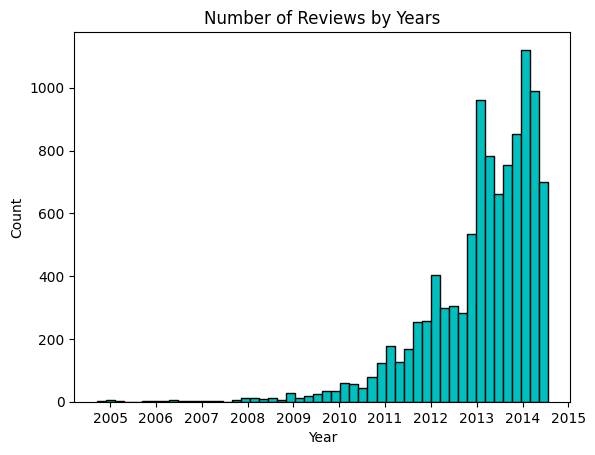

In [53]:
# distribution of reviews by years
plt.hist(musical_data['reviewTime'], bins=50, edgecolor='black', color='c')

plt.title('Number of Reviews by Years')
plt.xlabel('Year')
plt.ylabel('Count')

# Show plot
plt.show()

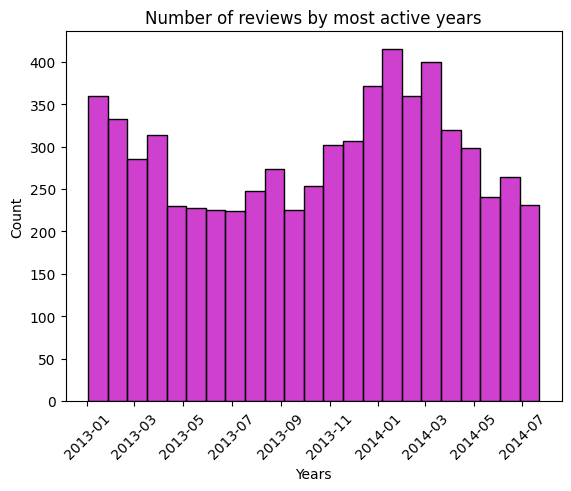

In [56]:
import seaborn as sns
# distribution of reviews by years
sns.histplot(musical_data.loc[musical_data.reviewTime > '2013']['reviewTime'], bins=23, color='m')
plt.xticks(rotation=45)
plt.title('Number of reviews by most active years')
plt.xlabel('Years')
plt.ylabel('Count')

# Show plot
plt.show()

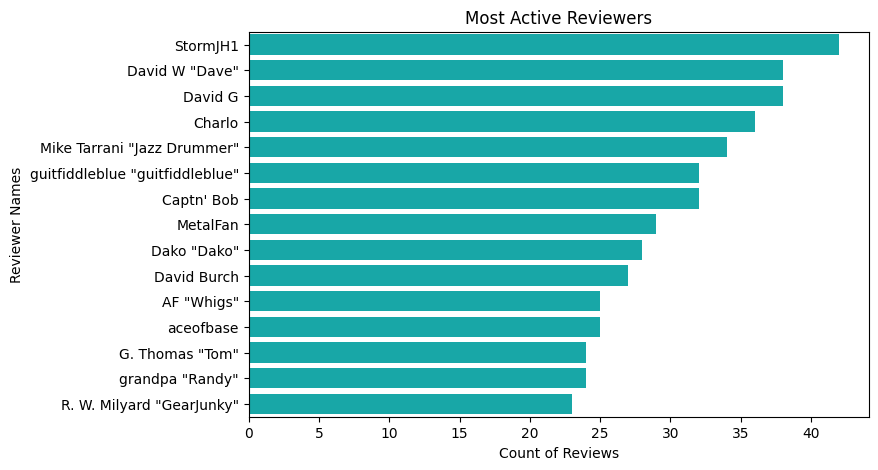

In [62]:
id_to_name = dict(zip(musical_data['reviewerID'], musical_data['reviewerName']))

# Get the counts of reviews per reviewerID
user_name_counts = musical_data['reviewerID'].value_counts()

# Extract the top 15 reviewerIDs
top_reviewers = user_name_counts.index[:15]

# Map the reviewerIDs to reviewerNames
top_reviewer_names = [id_to_name[reviewer_id] for reviewer_id in top_reviewers]

plt.figure(figsize=(8, 5))

# Create the count plot with ordered horizontal bars
sns.countplot(data=musical_data, y='reviewerID', order=top_reviewers, color='c')

# Set the y-ticks to display user names instead of IDs
plt.yticks(ticks=range(len(top_reviewers)), labels=top_reviewer_names)

# Set the title, x-label, and y-label
plt.title('Most Active Reviewers')
plt.xlabel('Count of Reviews')
plt.ylabel('Reviewer Names')

# Show the plot
plt.show()

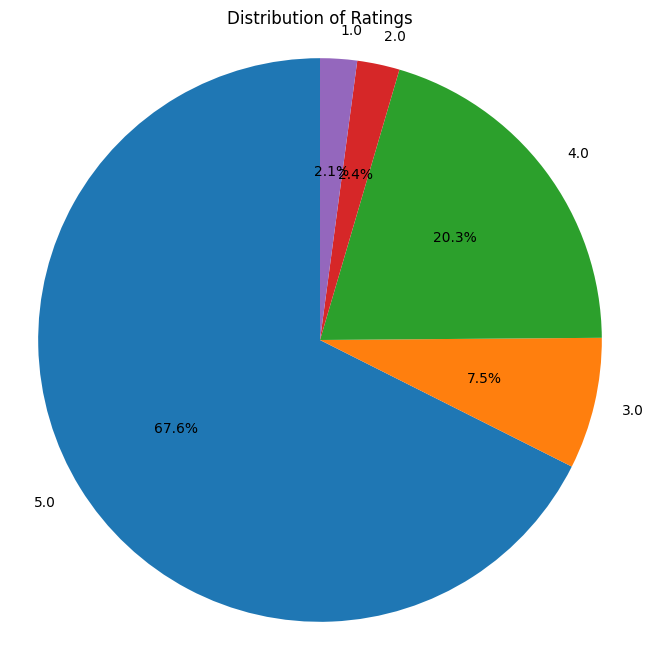

In [64]:
category_counts = musical_data['overall'].value_counts(sort=False)

# Create pie chart
plt.figure(figsize=(8, 8))  # Adjust size as needed
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

**Summary**

Looking through the analysis, we can observe that the dataset predominantly consists of positive reviews, with the highest number of reviews receiving a 5-star rating. Sentiment analysis confirms a large proportion of positive sentiments in the reviews. Similarly, the summary sentiments also exhibit a positive trend. The most frequently occurring words in the review texts include terms related to musical instruments and their usage, suggesting that functionality and performance are key topics for reviewers.

The LDA Model identified topics revolving around various musical accessories and their quality, ease of use, and performance. Key topics include guitars, pedals, tuners, picks, cables, stands, straps, and microphones.

In the NMF Model, similar themes were identified, emphasizing specific products like tuners, strings, straps, picks, pedals, cables, stands, and microphones. The topics reflect detailed aspects of product performance and user satisfaction. Thus, common topics include pedals and sound, cables and quality, guitar cases and playability, etc.

The most active reviewers include StormjH1, David W 'Dave', David G, and Charlo, indicating a few highly engaged users who contribute extensively to the review dataset.

Therefore, we can conclude that the reviews are overwhelmingly positive, reflecting high customer satisfaction with the musical products.